## **Intelligent Road Accident Prediction System**

The project tries to predict severity of road accidents based on several parameters such as weather, location, etc. This would be helpful in early emergency response and infrastructure improvement.

The dataset used is the UK government amassed traffic data from 2000 and 2018, with over 1.8 million accidents recorded. It contains 33 Features covering over a 1.8million records.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


 # Importing Modules




In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_style('whitegrid')

%matplotlib inline

In [ ]:
df = pd.read_csv(r'/content/UK_Accident.csv', parse_dates=['Date', 'Time'])

# Exploratory Data Analysis

In [ ]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
                 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location'], inplace=True)

In [ ]:
df.sample(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
7642,200501JI40612,0.07,51.56,1.00,3.00,2.00,1.00,05/09/2005,2.00,2024-05-27 08:15:00,14.00,6.00,0.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
10295,200501LX50608,-0.12,51.45,1.00,2.00,2.00,1.00,24/05/2005,3.00,2024-05-27 19:40:00,9.00,3.00,23.00,Single carriageway,30.00,Automatic traffic signal,3.00,205.00,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
3431,200501EO40879,-0.15,51.57,1.00,3.00,2.00,1.00,24/08/2005,4.00,2024-05-27 13:09:00,2.00,5.00,0.00,Single carriageway,30.00,Giveway or uncontrolled,6.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining with high winds,Wet/Damp,NaN,NaN,1.00,Yes,2005.00
9530,200501KG70159,0.13,51.53,1.00,2.00,2.00,1.00,15/04/2005,6.00,2024-05-27 15:42:00,16.00,3.00,13.00,Dual carriageway,50.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
2228,200501CW11550,-0.16,51.51,1.00,3.00,2.00,1.00,14/09/2005,4.00,2024-05-27 19:30:00,1.00,3.00,5204.00,Single carriageway,30.00,Giveway or uncontrolled,6.00,0.00,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.00,No,2005.00


In [ ]:
print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 10480
No. of cols: 28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               10480 non-null  object        
 1   Longitude                                    10480 non-null  float64       
 2   Latitude                                     10479 non-null  float64       
 3   Police_Force                                 10479 non-null  float64       
 4   Accident_Severity                            10479 non-null  float64       
 5   Number_of_Vehicles                           10479 non-null  float64       
 6   Number_of_Casualties                         10479 non-null  float64       
 7   Date                                         10479 non-null  object        
 8   Day_of_Week                                  10479 non-null  float64       


In [ ]:
df.isna().sum()

Accident_Index                                     0
Longitude                                          0
Latitude                                           1
Police_Force                                       1
Accident_Severity                                  1
Number_of_Vehicles                                 1
Number_of_Casualties                               1
Date                                               1
Day_of_Week                                        1
Time                                               1
Local_Authority_(District)                         1
1st_Road_Class                                     1
1st_Road_Number                                    1
Road_Type                                          1
Speed_limit                                        1
Junction_Control                                2972
2nd_Road_Class                                     1
2nd_Road_Number                                    1
Pedestrian_Crossing-Human_Control             

In [ ]:
df.dropna(subset=['Longitude', 'Time', 'Pedestrian_Crossing-Human_Control',
                  'Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [ ]:
dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  0


In [ ]:
df.drop_duplicates(inplace=True)
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  10479


In [ ]:
df.describe(include=np.number)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00,10479.00
mean,-0.06,51.53,2.39,2.90,1.77,1.16,4.09,25.63,3.85,492.80,31.07,3.14,206.37,1.01,2005.00
std,0.12,0.04,7.96,0.30,0.63,0.50,1.90,95.31,1.20,1082.66,4.83,2.84,745.22,0.12,0.00
min,-0.51,51.41,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,20.00,-1.00,-1.00,1.00,2005.00
25%,-0.14,51.51,1.00,3.00,1.00,1.00,3.00,3.00,3.00,0.00,30.00,-1.00,0.00,1.00,2005.00
50%,-0.09,51.53,1.00,3.00,2.00,1.00,4.00,11.00,3.00,103.00,30.00,3.00,0.00,1.00,2005.00
75%,0.01,51.56,1.00,3.00,2.00,1.00,6.00,14.00,5.00,400.00,30.00,6.00,11.00,1.00,2005.00
max,0.30,51.65,48.00,3.00,8.00,10.00,7.00,570.00,6.00,5210.00,70.00,6.00,5210.00,2.00,2005.00


In [ ]:
df.describe(include=[object])

,Accident_Index,Date,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,10479,10479,10479,7508,10479,10479,10479,10479,10479,124,49,10479
unique,10479,365,6,4,3,6,5,9,5,7,5,2
top,200501BS00001,19/05/2005,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,Other object in carriageway,Yes
freq,1,47,8106,5132,10462,7339,7392,9259,8788,64,29,8550


In [ ]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

15

In [ ]:
categorical_data = df.select_dtypes(include='object')
cat_cols = categorical_data.columns
len(cat_cols)

12

In [ ]:
cat_cols

Index(['Accident_Index', 'Date', 'Road_Type', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

**Assessing the distribution, normality, and presence of outliers in the data**

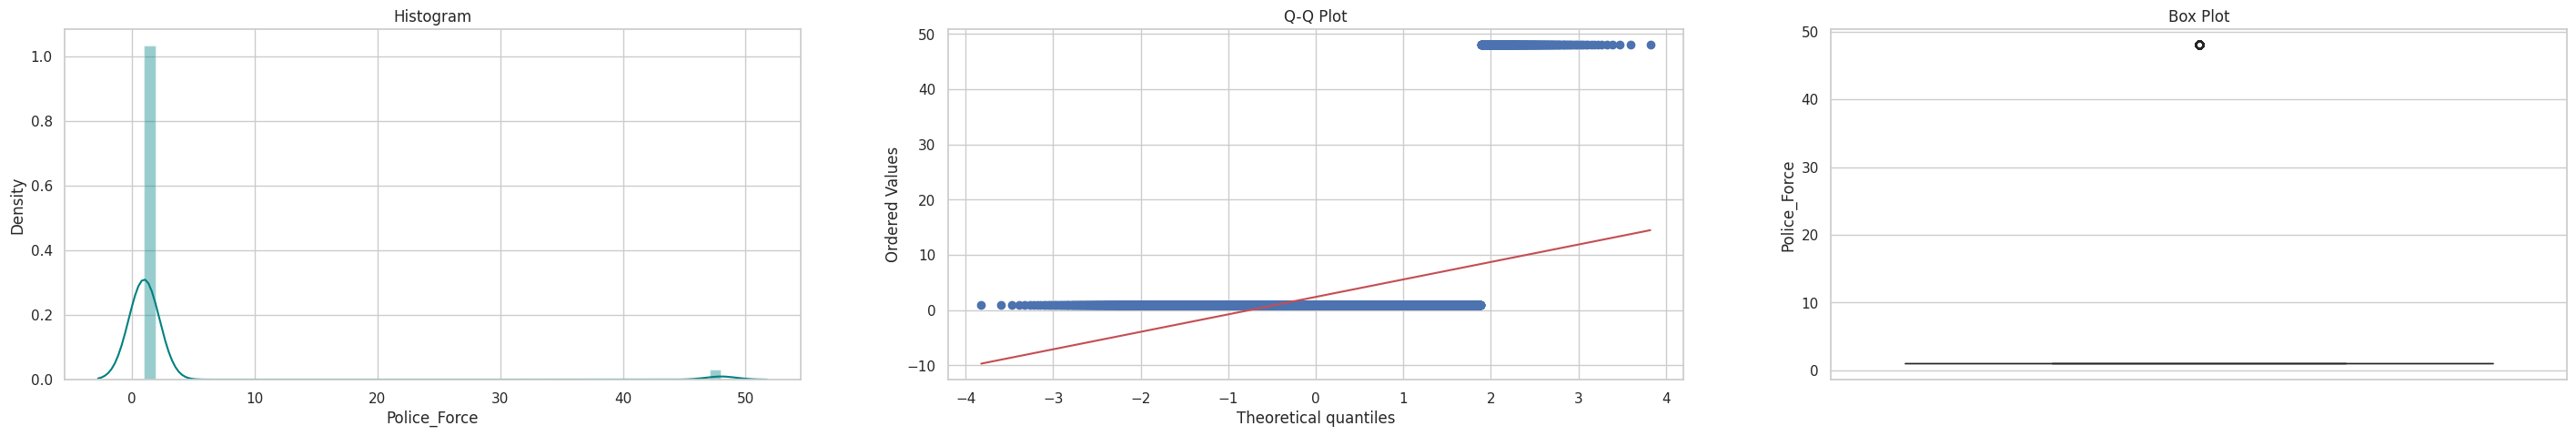

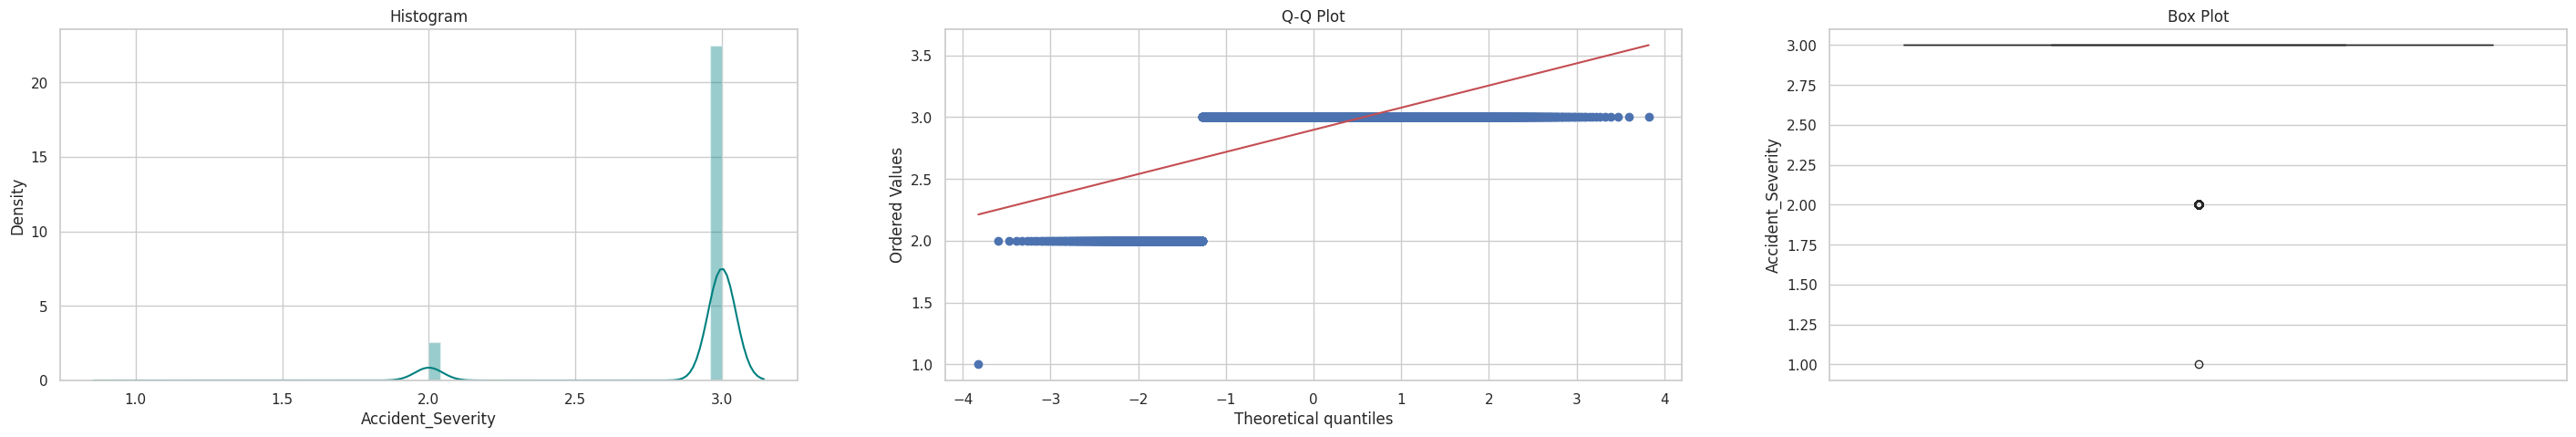

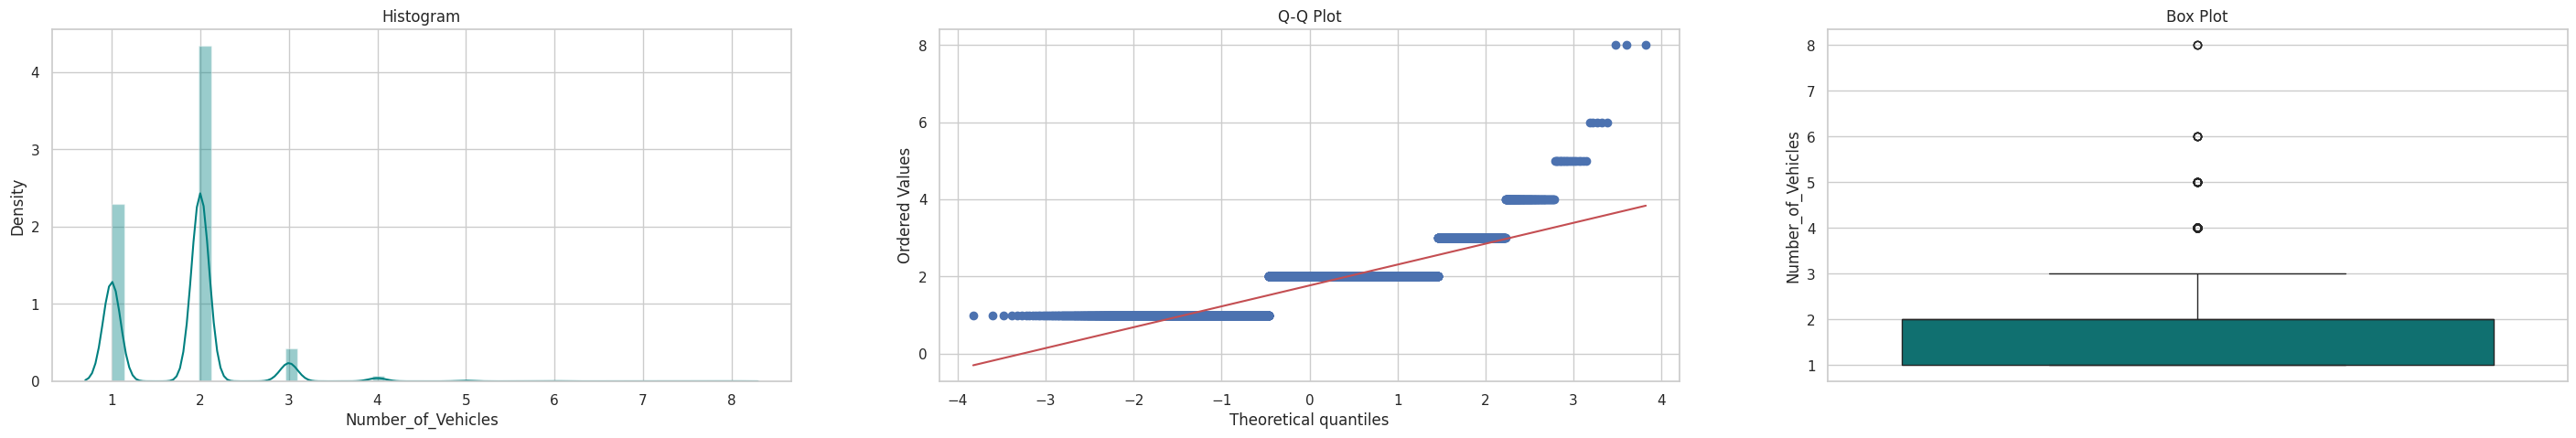

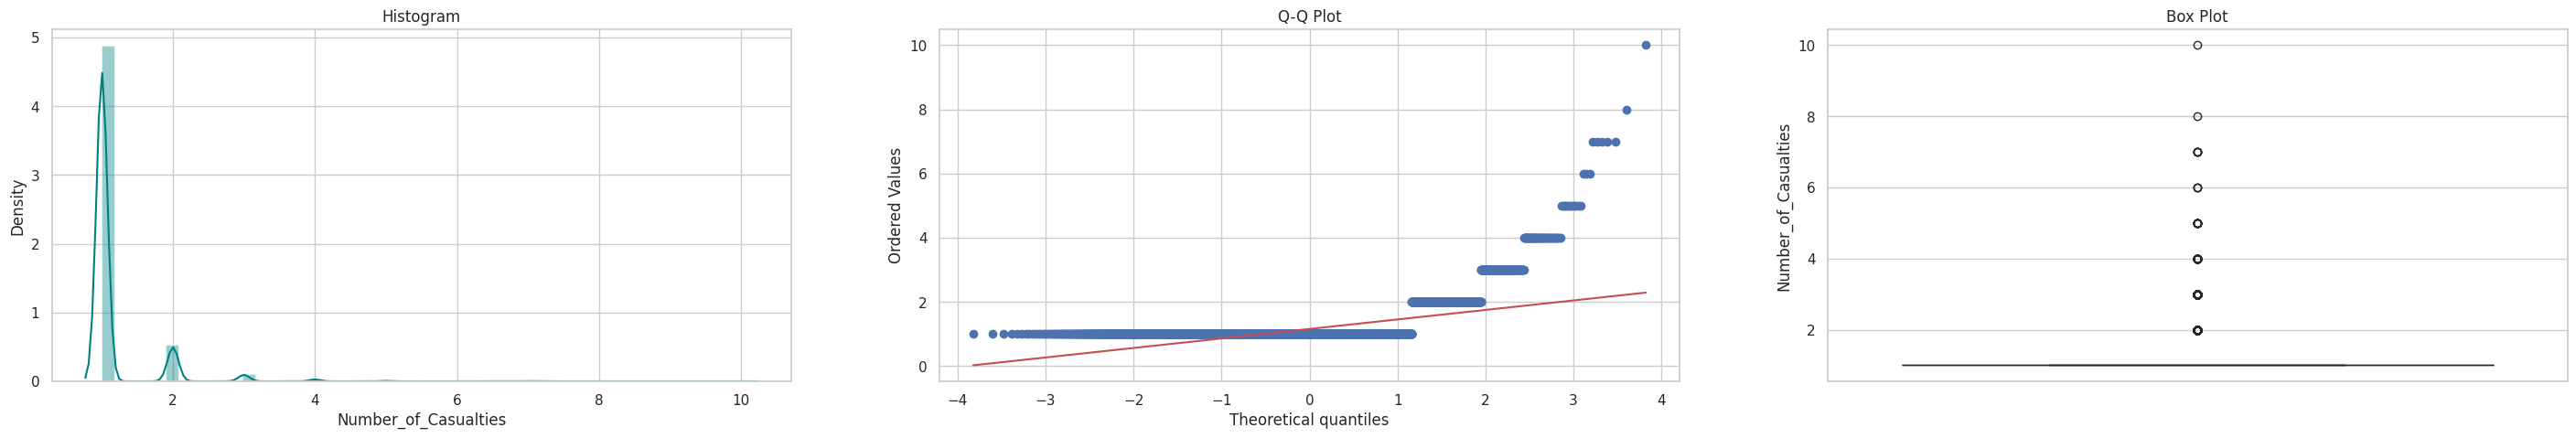

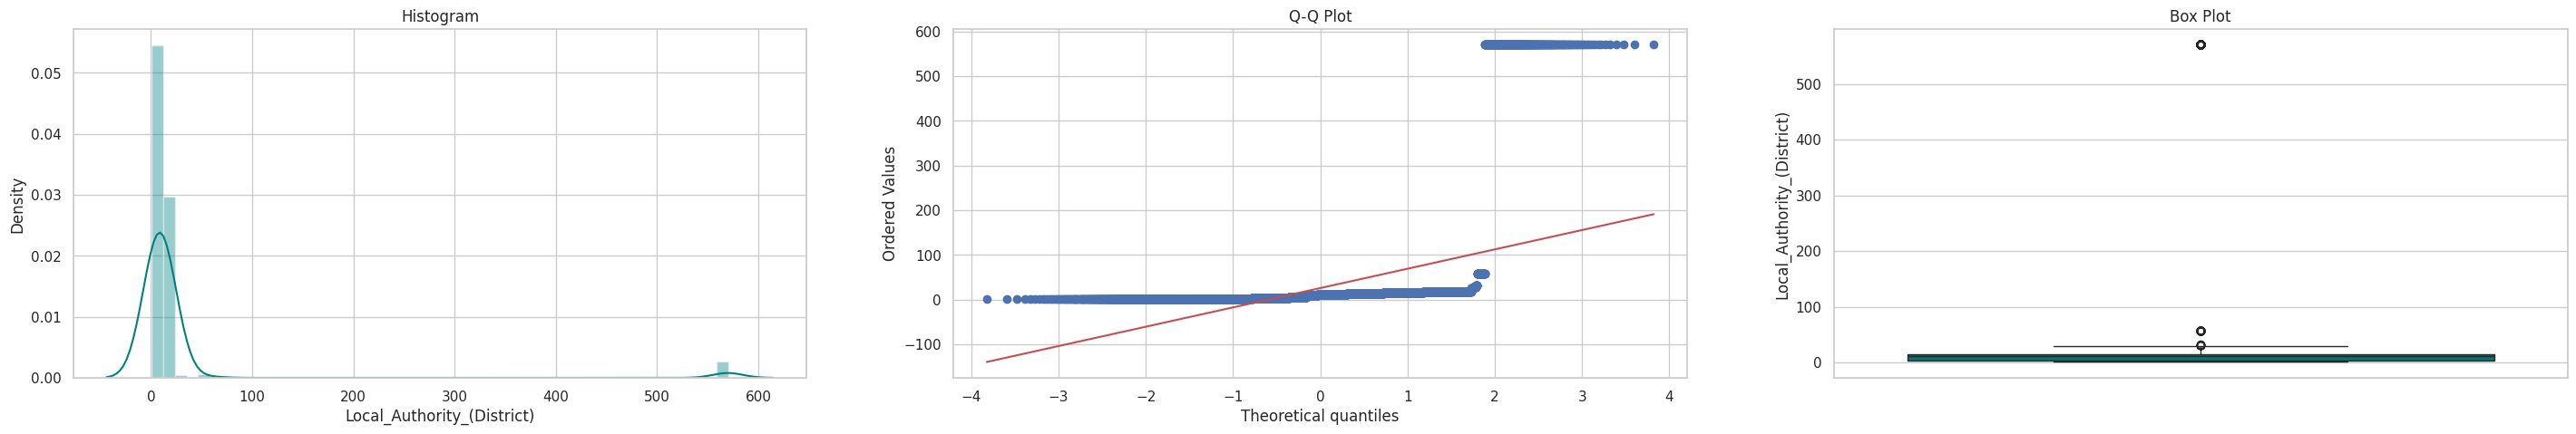

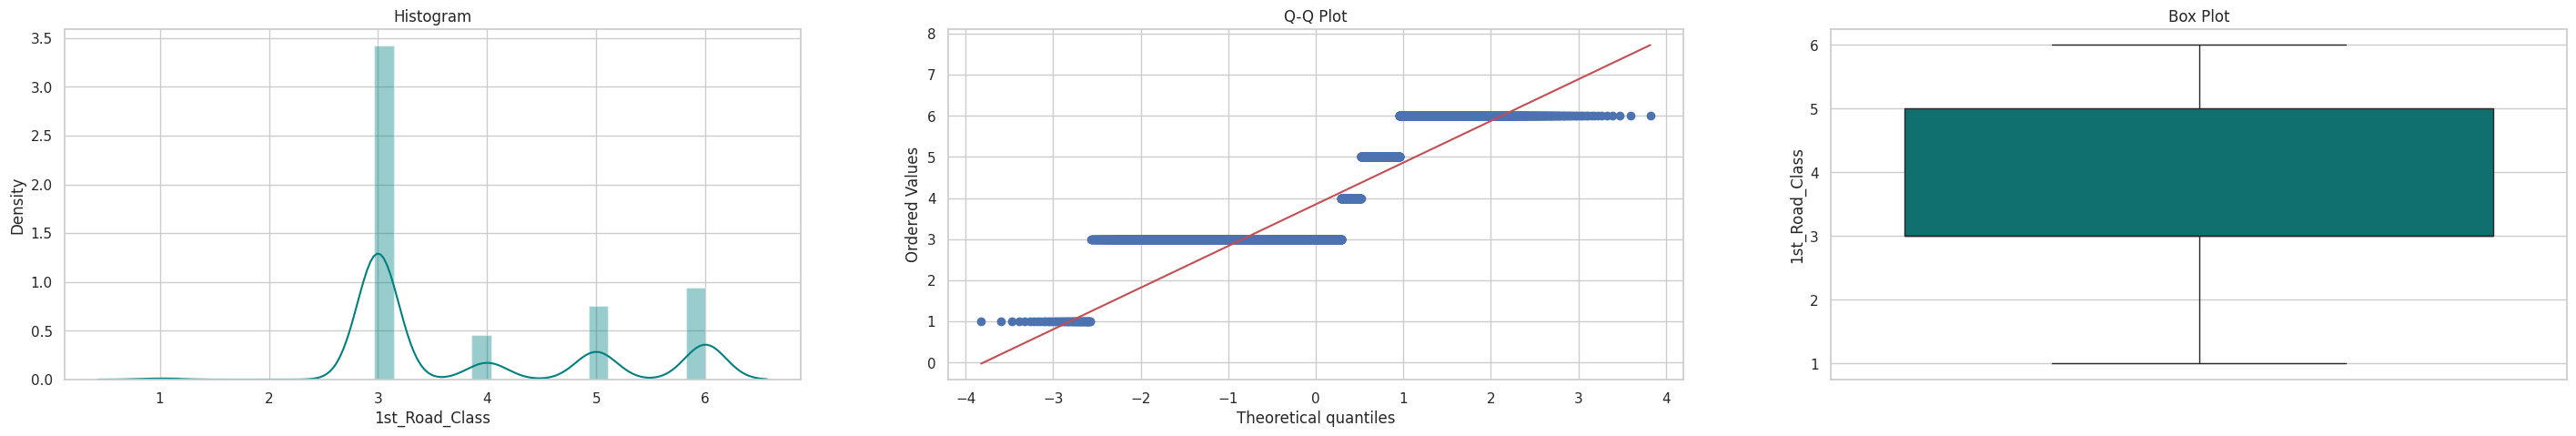

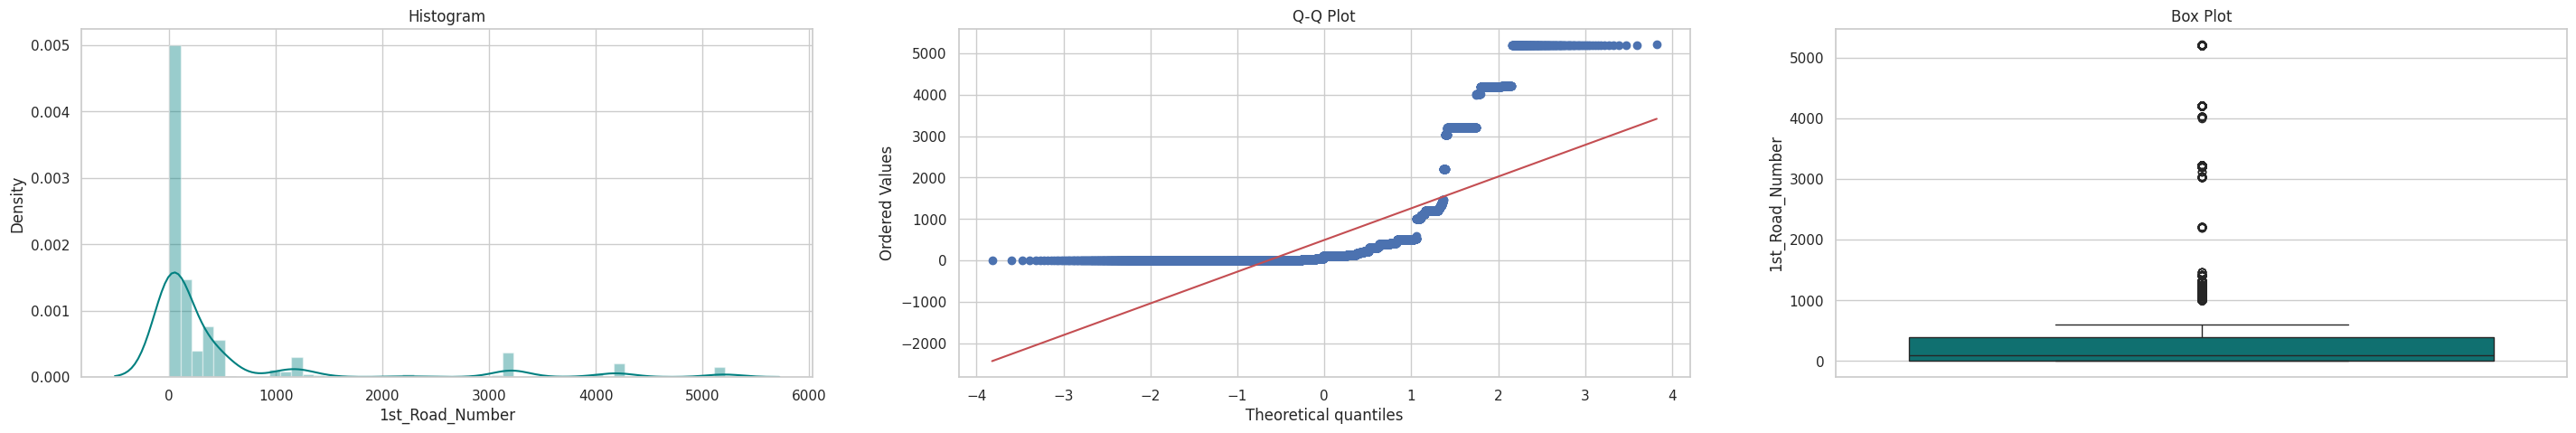

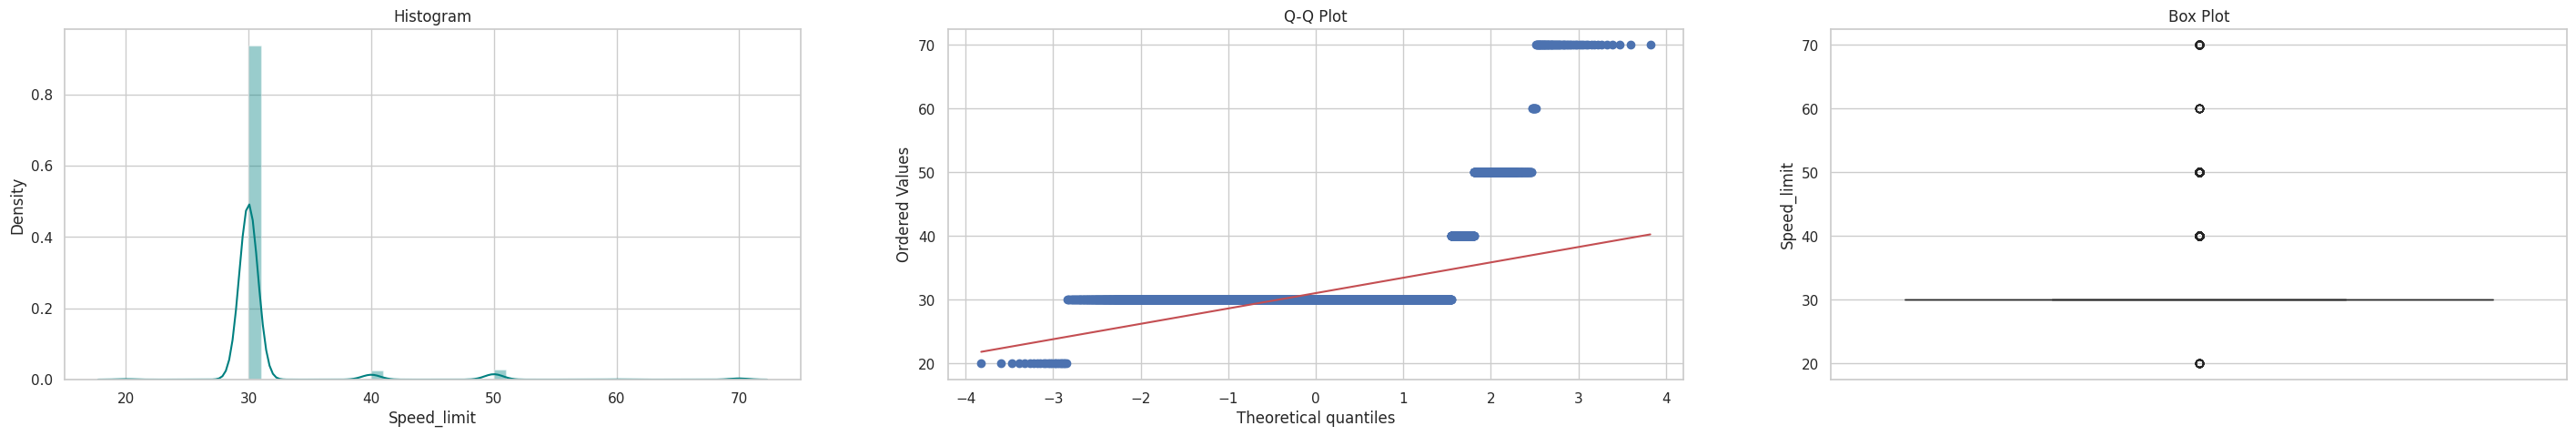

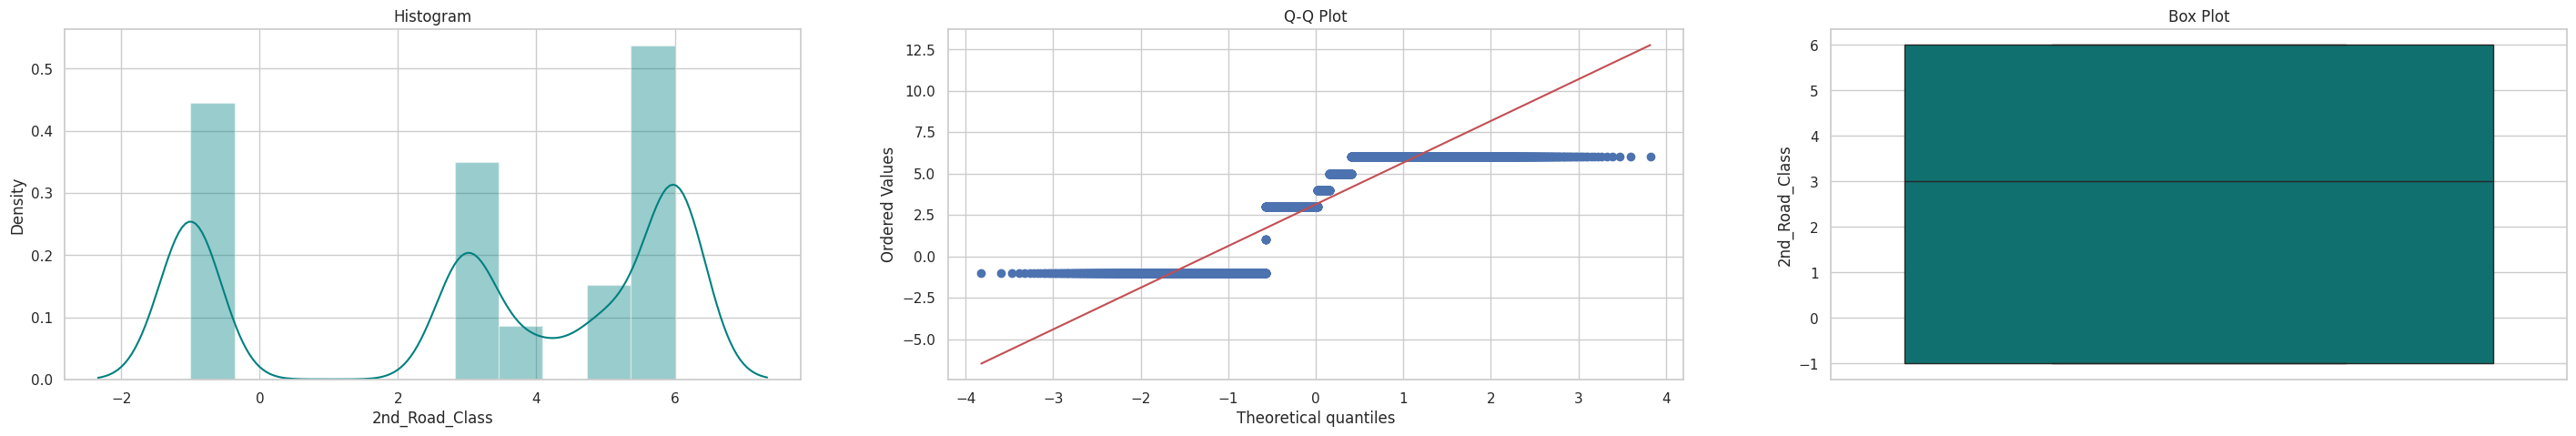

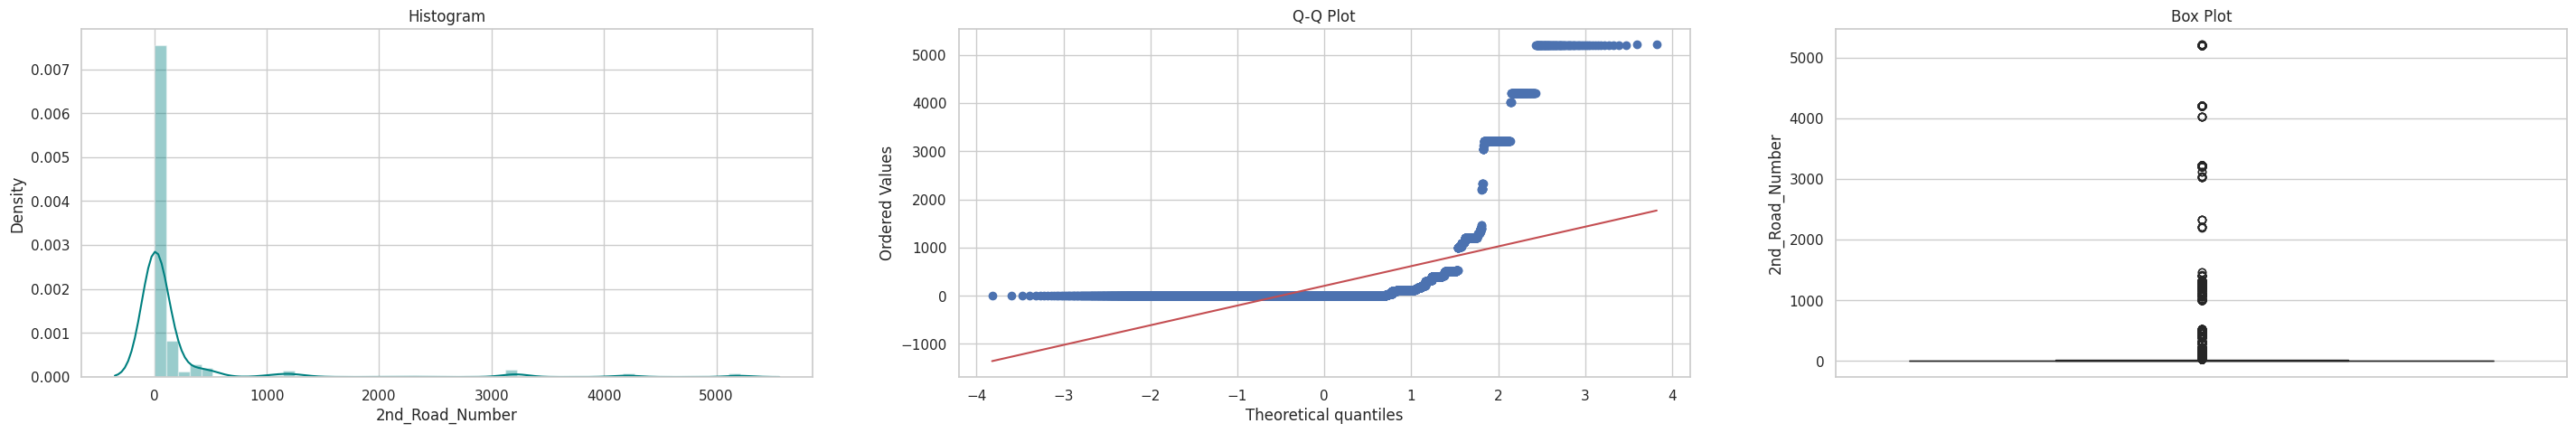

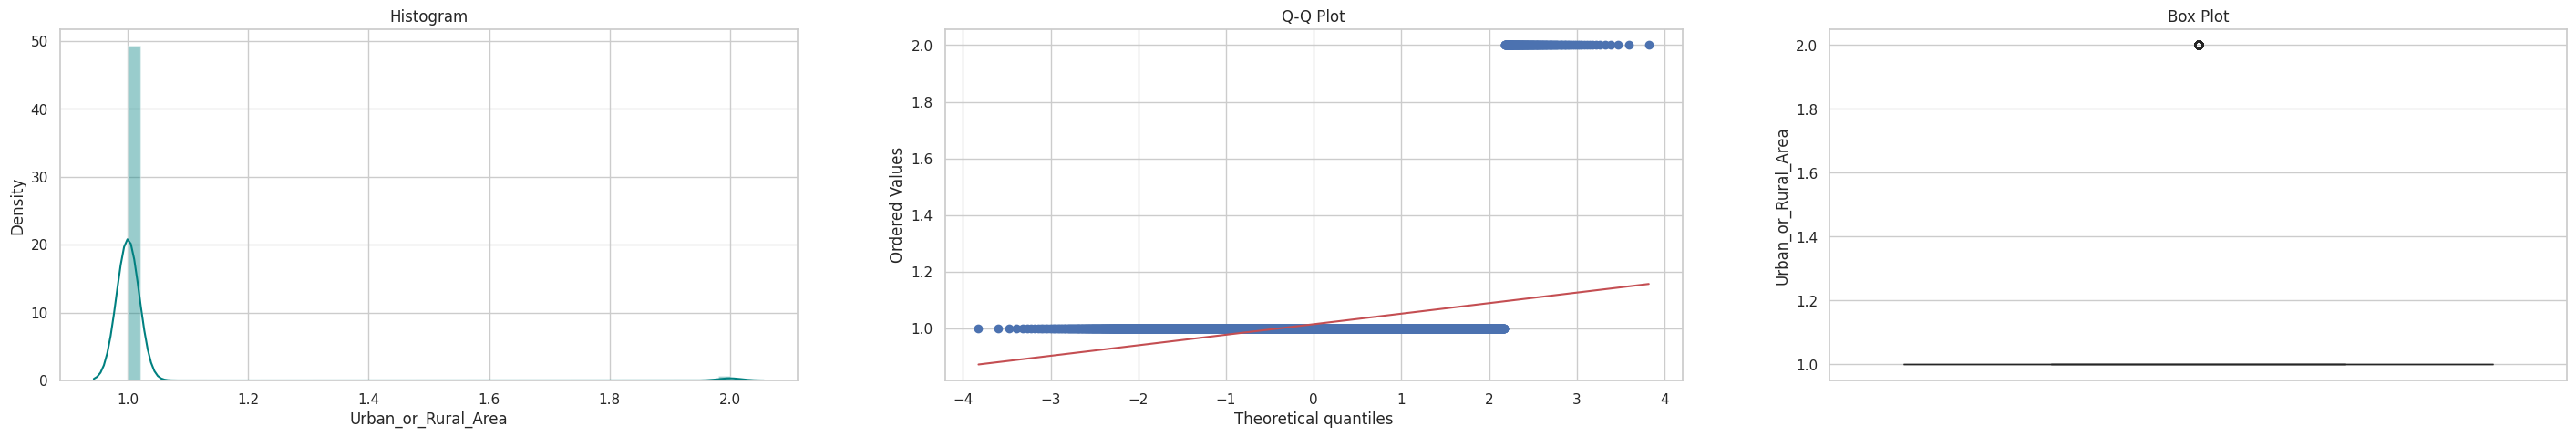

In [ ]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)

    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='teal')
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='teal')
    plt.title('Box Plot')
    plt.show()

dist_lst = ['Police_Force', 'Accident_Severity',
            'Number_of_Vehicles', 'Number_of_Casualties',
            'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
            'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
            'Urban_or_Rural_Area']

for col in dist_lst:
    diagnostic_plot(df, col)

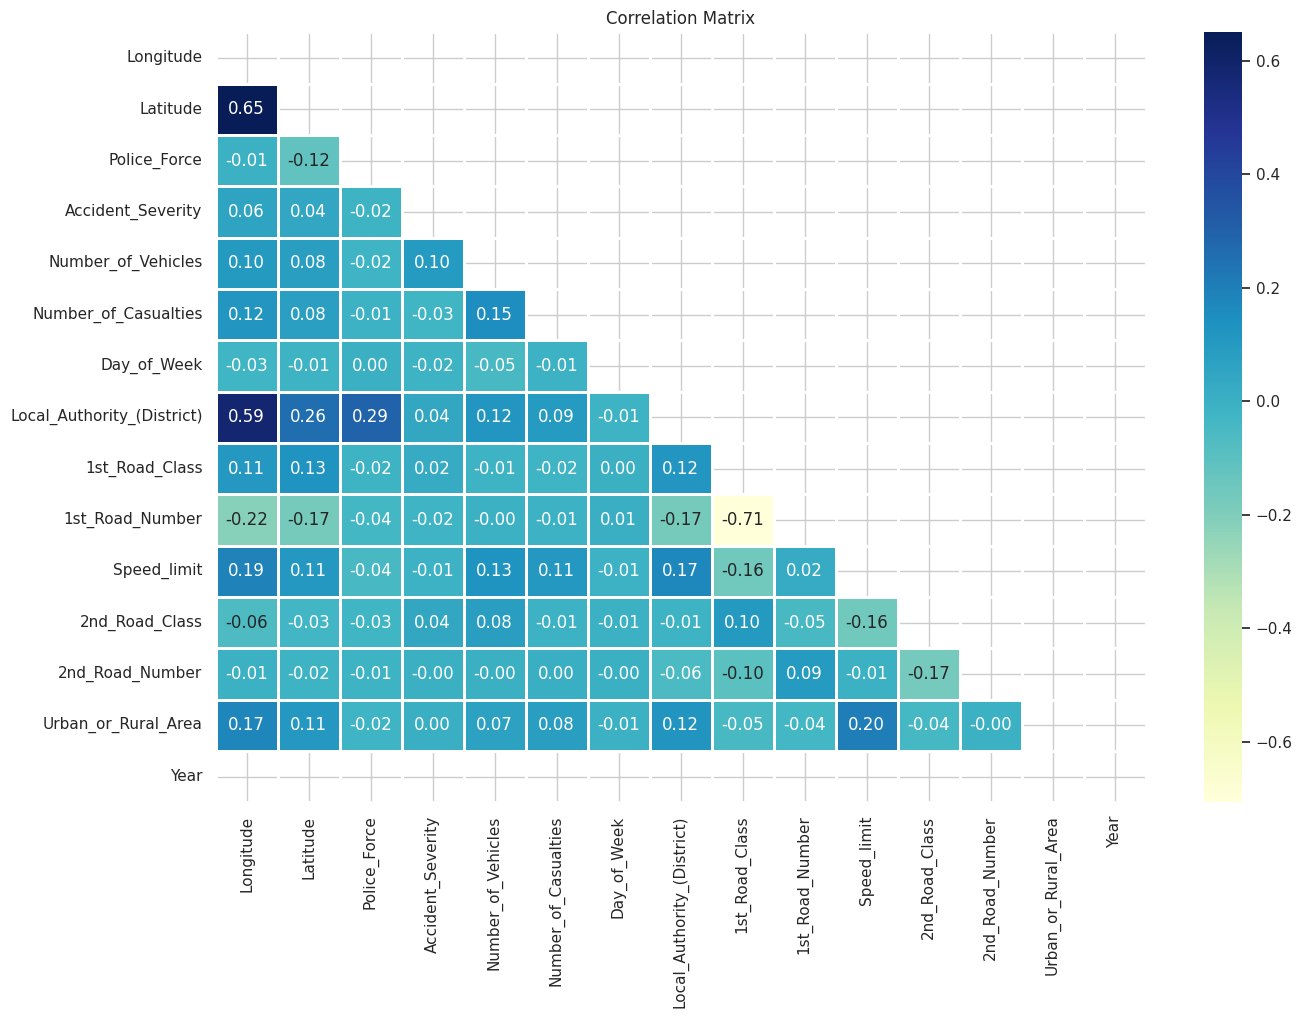

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 10))

cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')

plt.show()

In [ ]:
def get_corr(data, threshold):
    numeric_data = data.select_dtypes(include=[np.number])

    corr_col = set()
    cormat = numeric_data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i, j]) > threshold:
                col_name = cormat.columns[i]
                corr_col.add(col_name)
    return corr_col
corr_features = get_corr(df, 0.80)
print(corr_features)

{'Local_Authority_(District)'}


In [ ]:
df.drop(columns=['Local_Authority_(District)'],
        axis=1, inplace=True)

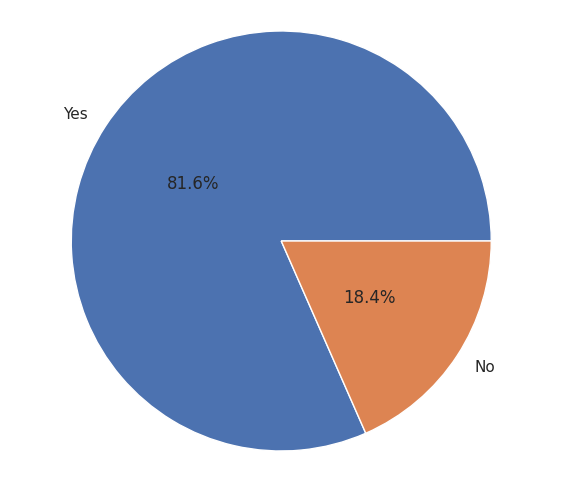

In [ ]:
def pie_chart(data, col):

  x = data[col].value_counts().values
  plt.figure(figsize=(7, 6))
  plt.pie(x, center=(0, 0), radius=1.5, labels=data[col].unique(),
          autopct='%1.1f%%', pctdistance=0.5)
  plt.axis('equal')
  plt.show()

pie_lst = ['Did_Police_Officer_Attend_Scene_of_Accident']
for col in pie_lst:
  pie_chart(df, col)

In [ ]:
df.sample(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
3142,200501EO40566,-0.14,51.53,1.00,3.00,2.00,1.00,21/06/2005,3.00,2024-05-27 18:00:00,3.00,400.00,Single carriageway,30.00,Giveway or uncontrolled,5.00,0.00,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,No,2005.00
2714,200501EO40037,-0.09,51.54,1.00,3.00,2.00,1.00,07/02/2005,2.00,2024-05-27 12:40:00,3.00,104.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
8651,200501KF60050,0.06,51.55,1.00,2.00,8.00,1.00,19/01/2005,4.00,2024-05-27 11:04:00,6.00,0.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
6418,200501JC30070,-0.03,51.60,1.00,3.00,2.00,1.00,28/01/2005,6.00,2024-05-27 14:33:00,4.00,179.00,Roundabout,30.00,Giveway or uncontrolled,6.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
9759,200501KG70430,0.10,51.53,1.00,3.00,2.00,2.00,15/08/2005,2.00,2024-05-27 10:40:00,6.00,0.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,No,2005.00


In [ ]:
df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
1.00    10325
2.00      154
Name: count, dtype: int64

In [ ]:
df['Urban_or_Rural_Area'].replace(3, 1, inplace=True)

In [ ]:
df['Accident_Severity'].value_counts()

Accident_Severity
3.00    9405
2.00    1073
1.00       1
Name: count, dtype: int64

In [ ]:
dt1 = df.groupby('Date')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig = px.line(dt1, x='Date', y='No. of Accidents',
              labels={'index': 'Date', 'value': 'No. of Accidents'})
fig.show()

The above code aggregates the count of accidents for each date and then visualizes it using a line plot. As, we can see from above, highest number of accidents occured in October, 2005.

In [ ]:
len(df['Accident_Index'].unique())
df.drop('Accident_Index',axis=1,inplace=True)

In [ ]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1.00,2.00,1.00,1.00,04/01/2005,3.00,2024-05-27 17:42:00,3.00,3218.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1.00,Yes,2005.00
1,-0.21,51.52,1.00,3.00,1.00,1.00,05/01/2005,4.00,2024-05-27 17:36:00,4.00,450.00,Dual carriageway,30.00,Automatic traffic signal,5.00,0.00,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
2,-0.21,51.53,1.00,3.00,2.00,1.00,06/01/2005,5.00,2024-05-27 00:15:00,5.00,0.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
3,-0.17,51.48,1.00,3.00,1.00,1.00,07/01/2005,6.00,2024-05-27 10:35:00,3.00,3220.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1.00,Yes,2005.00
4,-0.16,51.50,1.00,3.00,1.00,1.00,10/01/2005,2.00,2024-05-27 21:13:00,6.00,0.00,Single carriageway,30.00,NaN,-1.00,0.00,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1.00,Yes,2005.00


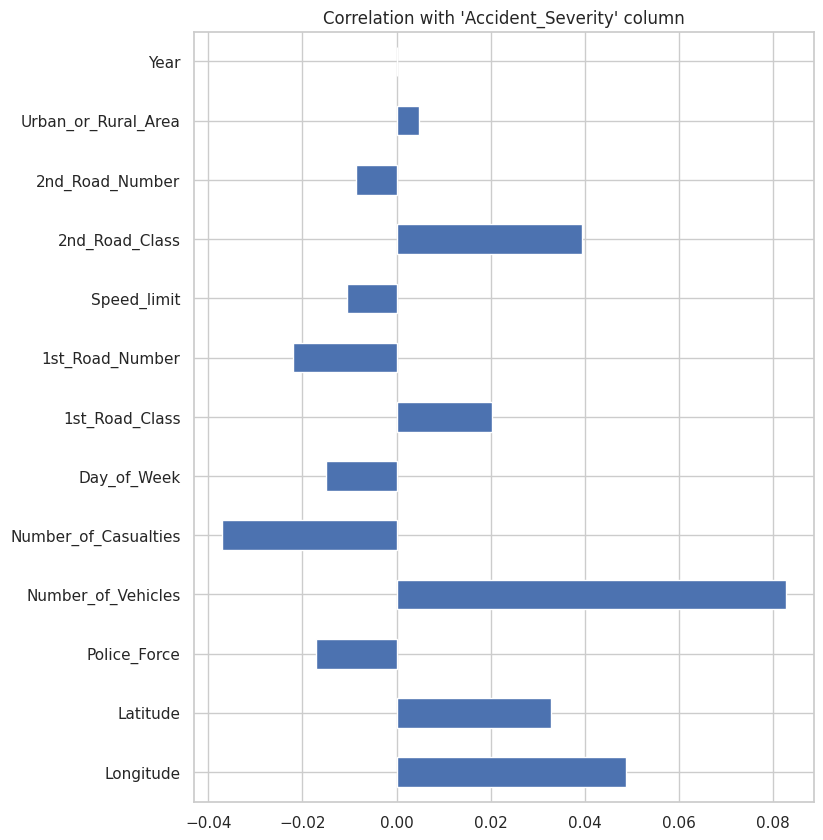

In [ ]:
# Drop non-numeric columns from X
X = df.select_dtypes(include=[np.number]).drop(columns=['Accident_Severity'], axis=1)

# Check correlation
correlation = X.corrwith(df['Accident_Severity'])

# Plot correlation
plt.figure(figsize=(8, 10))
correlation.plot(kind='barh', title="Correlation with 'Accident_Severity' column")
plt.show()


In [ ]:
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_cols)

['Date', 'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']


In [ ]:
for feature in cat_cols:
    print(f'The {feature} has following number of {len(df[feature].unique())}')

The Date has following number of 365
The Road_Type has following number of 6
The Junction_Control has following number of 5
The Pedestrian_Crossing-Human_Control has following number of 3
The Pedestrian_Crossing-Physical_Facilities has following number of 6
The Light_Conditions has following number of 5
The Weather_Conditions has following number of 9
The Road_Surface_Conditions has following number of 5
The Special_Conditions_at_Site has following number of 8
The Carriageway_Hazards has following number of 6
The Did_Police_Officer_Attend_Scene_of_Accident has following number of 2


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

for feature in cat_cols:
    df[feature]=labelencoder.fit_transform(df[feature])

Label Encoder converts categorical data into numerical values. The conversion is necessary for algorithms that require numerical values

In [ ]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1.00,2.00,1.00,1.00,36,3.00,2024-05-27 17:42:00,3.00,3218.00,3,30.00,4,-1.00,0.00,2,4,4,5,4,7,5,1.00,1,2005.00
1,-0.21,51.52,1.00,3.00,1.00,1.00,48,4.00,2024-05-27 17:36:00,4.00,450.00,0,30.00,1,5.00,0.00,2,3,2,1,0,7,5,1.00,1,2005.00
2,-0.21,51.53,1.00,3.00,2.00,1.00,60,5.00,2024-05-27 00:15:00,5.00,0.00,3,30.00,4,-1.00,0.00,2,2,2,1,0,7,5,1.00,1,2005.00
3,-0.17,51.48,1.00,3.00,1.00,1.00,72,6.00,2024-05-27 10:35:00,3.00,3220.00,3,30.00,4,-1.00,0.00,2,2,4,1,0,7,5,1.00,1,2005.00
4,-0.16,51.50,1.00,3.00,1.00,1.00,108,2.00,2024-05-27 21:13:00,6.00,0.00,3,30.00,4,-1.00,0.00,2,2,1,1,4,7,5,1.00,1,2005.00


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, and year components
df["day"] = df['Date'].dt.day
df["month"] = df['Date'].dt.month
df["year"] = df['Date'].dt.year

# Drop the 'Year' column
df.drop('year', axis=1, inplace=True)

# Display the DataFrame
df.head()


,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,day,month
0,-0.19,51.49,1.00,2.00,1.00,1.00,1970-01-01 00:00:00.000000036,3.00,2024-05-27 17:42:00,3.00,3218.00,3,30.00,4,-1.00,0.00,2,4,4,5,4,7,5,1.00,1,1,1
1,-0.21,51.52,1.00,3.00,1.00,1.00,1970-01-01 00:00:00.000000048,4.00,2024-05-27 17:36:00,4.00,450.00,0,30.00,1,5.00,0.00,2,3,2,1,0,7,5,1.00,1,1,1
2,-0.21,51.53,1.00,3.00,2.00,1.00,1970-01-01 00:00:00.000000060,5.00,2024-05-27 00:15:00,5.00,0.00,3,30.00,4,-1.00,0.00,2,2,2,1,0,7,5,1.00,1,1,1
3,-0.17,51.48,1.00,3.00,1.00,1.00,1970-01-01 00:00:00.000000072,6.00,2024-05-27 10:35:00,3.00,3220.00,3,30.00,4,-1.00,0.00,2,2,4,1,0,7,5,1.00,1,1,1
4,-0.16,51.50,1.00,3.00,1.00,1.00,1970-01-01 00:00:00.000000108,2.00,2024-05-27 21:13:00,6.00,0.00,3,30.00,4,-1.00,0.00,2,2,1,1,4,7,5,1.00,1,1,1


In [ ]:
df.drop("Date",axis=1,inplace=True)
df.drop("Time",axis=1,inplace=True)

In [ ]:
df['Accident_Severity']=df['Accident_Severity'].map({1:0,2:1,3:2})

In [ ]:
dfnew=df[['Latitude','Longitude','Weather_Conditions','Light_Conditions','Road_Surface_Conditions','day','month','1st_Road_Number','Day_of_Week','Accident_Severity']]

In [ ]:
df.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'day', 'month'],
      dtype='object')

 **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
features = [feature for feature in dfnew.columns if feature!='Accident_Severity']
x = dfnew.iloc[0:50000, :-1]
y = dfnew.iloc[0:50000,[-1]]
x = StandardScaler().fit_transform(x)

Standardization is a common preprocessing step in machine learning that transforms the data to have a mean of zero and a standard deviation of one. This process ensures that the features are on a similar scale which can be important for certain algorithms.

**Addressing Class Imbalance**

In [ ]:
%%time
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)

CPU times: user 97.9 ms, sys: 23.9 ms, total: 122 ms
Wall time: 337 ms


**Splitting the Dataset**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# ExtraTrees Classifier



*   The Extra Trees Classifier is an ensemble learning method that belongs to the family of decision tree-based models.
*    It is an extension of the Random Forest algorithm and shares similarities with it.
* It is robust to noisy or irrelevant features, and can train faster than other models



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)

ExtraTreesClassifier()

In [ ]:
preds=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
clf_score=accuracy_score(y_test,preds)
print(clf_score)

0.9774595973915509


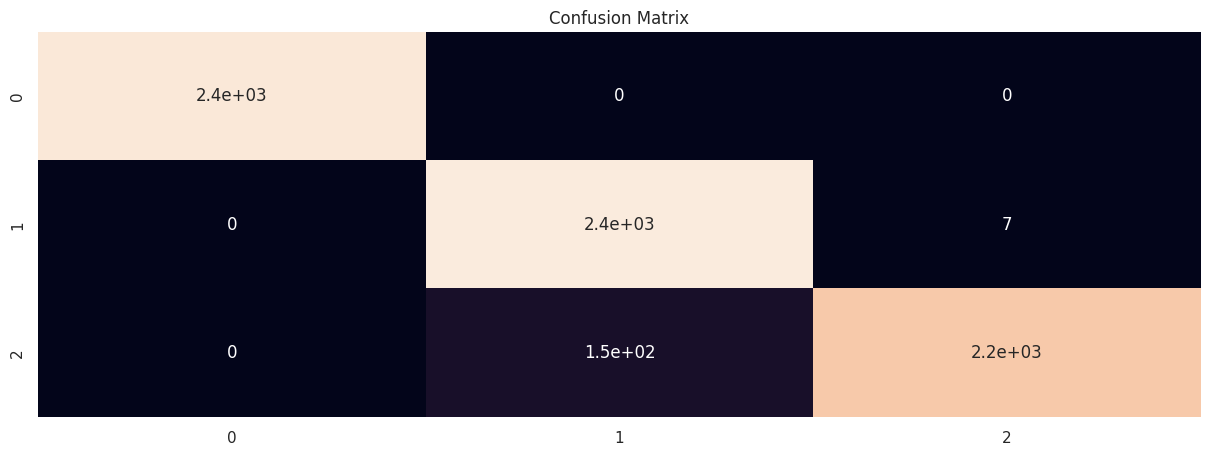

In [ ]:
fig = plt.figure(figsize=(15,5))
conmat = confusion_matrix(y_test, preds)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2354
           1       0.94      1.00      0.97      2385
           2       1.00      0.93      0.96      2315

    accuracy                           0.98      7054
   macro avg       0.98      0.98      0.98      7054
weighted avg       0.98      0.98      0.98      7054



# Logistic Regression





*   
Logistic Regression is a statistical method used for binary classification.
*   Despite its name, it is a classification algorithm rather than a regression algorithm.
* It models the probability that an instance belongs to a particular category.





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [ ]:
check = df.copy()
severity = check['Accident_Severity']
severity = pd.DataFrame(severity, columns = ['Accident_Severity'])

In [ ]:
%%time
model = LogisticRegression(solver = 'lbfgs', max_iter = 100)
score = cross_val_score(model, check, severity, cv = 5)
score.mean()

CPU times: user 1.55 s, sys: 1.41 s, total: 2.96 s
Wall time: 2.58 s


0.9372095957295633

# Random Forest Classifier



*   The Random Forest Classifier is an ensemble learning algorithm that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees.
*   It belongs to the family of tree-based models and is known for its robustness and high predictive accuracy.



In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(x_train, y_train)


CPU times: user 2.09 s, sys: 44.1 ms, total: 2.13 s
Wall time: 2.15 s


RandomForestClassifier(random_state=42)

In [ ]:
rf_score = rf_classifier.score(x_test,y_test)
rf_score

0.9761837255457896

# XGBoost Classifier



*   XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm known for its efficiency and performance in various types of predictive modeling tasks.
*   It falls under the category of gradient boosting algorithms and is widely used for both classification and regression problems



In [ ]:
from xgboost import XGBClassifier

In [ ]:
%%time
XGB=XGBClassifier(objective="multi:softmax",n_estimators=300,colsample_bytree=0.9, subsample=0.9)
XGB.fit(x_train, y_train)


CPU times: user 4.1 s, sys: 78.4 ms, total: 4.18 s
Wall time: 2.91 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Prediction
xgb_predict = XGB.predict(x_test)
XGB_score = accuracy_score(y_test, xgb_predict)
print("XGBoost Testing Accuracy: ", XGB_score)

XGBoost Testing Accuracy:  0.9512333427842359


In [ ]:
class_report2 = classification_report(y_test, xgb_predict)

print("Classification Report:\n", class_report2)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2354
           1       0.88      0.99      0.93      2385
           2       0.99      0.86      0.92      2315

    accuracy                           0.95      7054
   macro avg       0.96      0.95      0.95      7054
weighted avg       0.96      0.95      0.95      7054



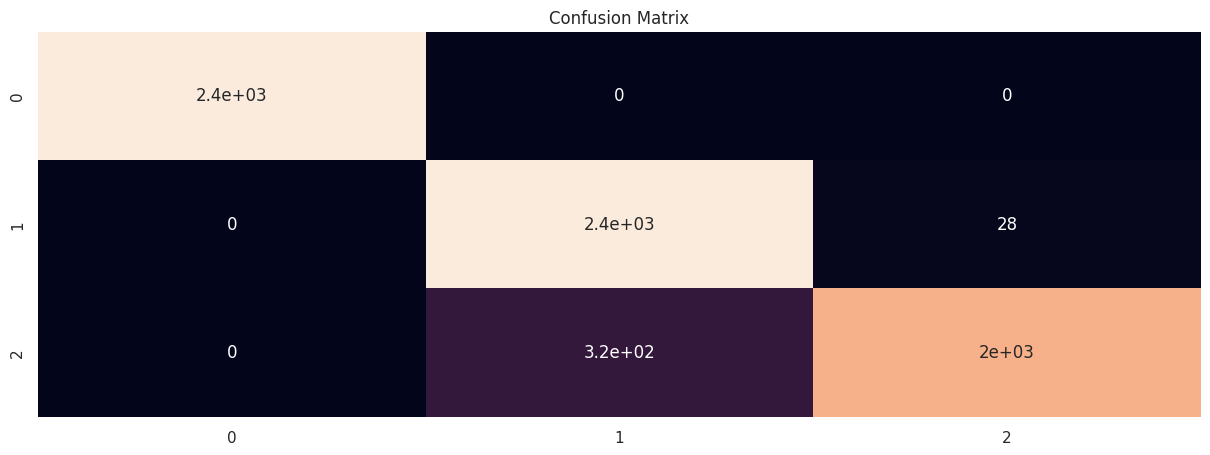

In [ ]:
fig = plt.figure(figsize=(15,5))
conmat = confusion_matrix(y_test, xgb_predict)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Classifier



*    Decision Trees work by recursively partitioning the dataset into subsets based on the values of input features.
*   The goal is to create a tree-like model where each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents the final predicted label or value.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test
tree_predict = tree.predict(x_test)

In [ ]:
# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_predict)
print("Accuracy:", tree_accuracy)

Accuracy: 0.9588885738588036


In [ ]:
class_report3 = classification_report(y_test, tree_predict)

print("Classification Report:\n", class_report3)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2354
           1       0.89      1.00      0.94      2385
           2       1.00      0.88      0.93      2315

    accuracy                           0.96      7054
   macro avg       0.96      0.96      0.96      7054
weighted avg       0.96      0.96      0.96      7054



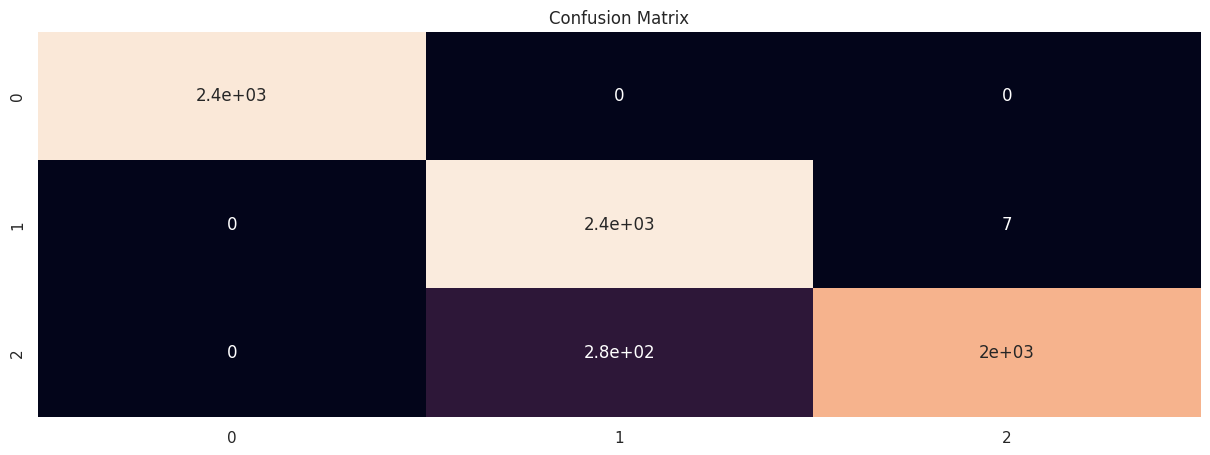

In [ ]:
fig = plt.figure(figsize=(15,5))
conmat = confusion_matrix(y_test, tree_predict)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

# Comparitive study of the different models used

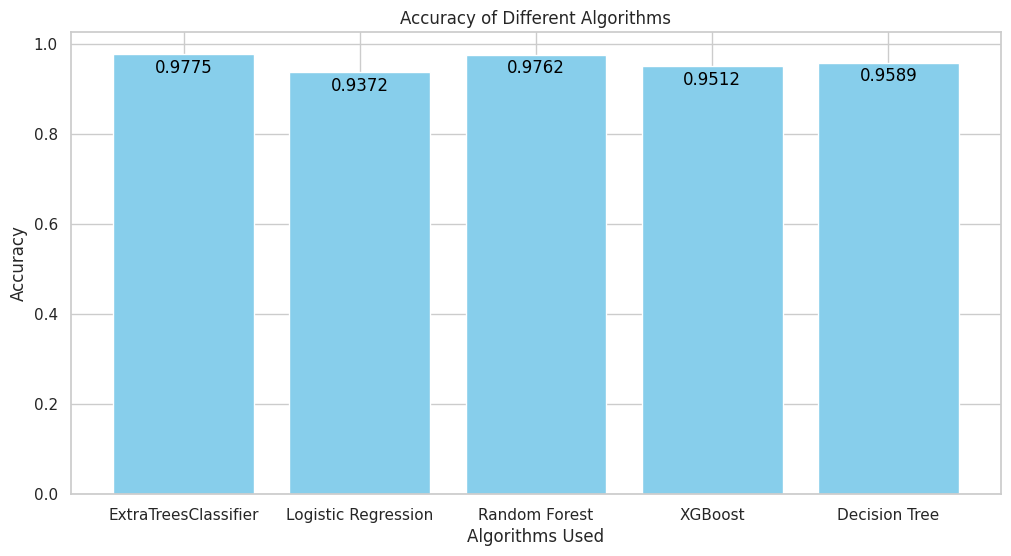

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['ExtraTreesClassifier', 'Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree']
values = [clf_score, score.mean(), rf_score, XGB_score, tree_accuracy]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, values, color='skyblue')

# Adding labels to each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{value:.4f}', ha='center', va='bottom', color='black')

# Title and labels
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms Used')
plt.ylabel('Accuracy')

# Show plot
plt.show()



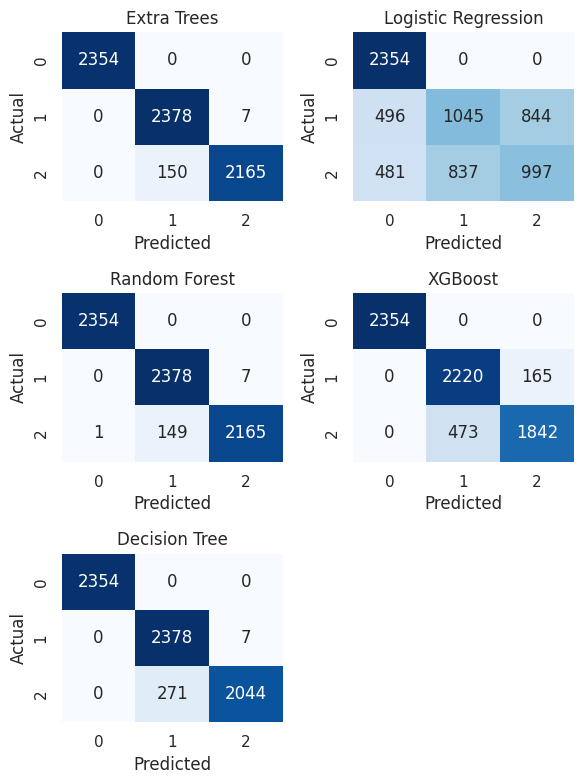

In [ ]:
# Create figure
fig = plt.figure(figsize=(6, 8))  # Adjust size as needed

# Plot confusion matrices
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    ax = fig.add_subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Tight layout
plt.tight_layout()

# Save the plot as an image
fig.savefig('confusion_matrices.jpeg', dpi=300)  # Specify the file name and DPI (dots per inch)

# Show the plot
plt.show()


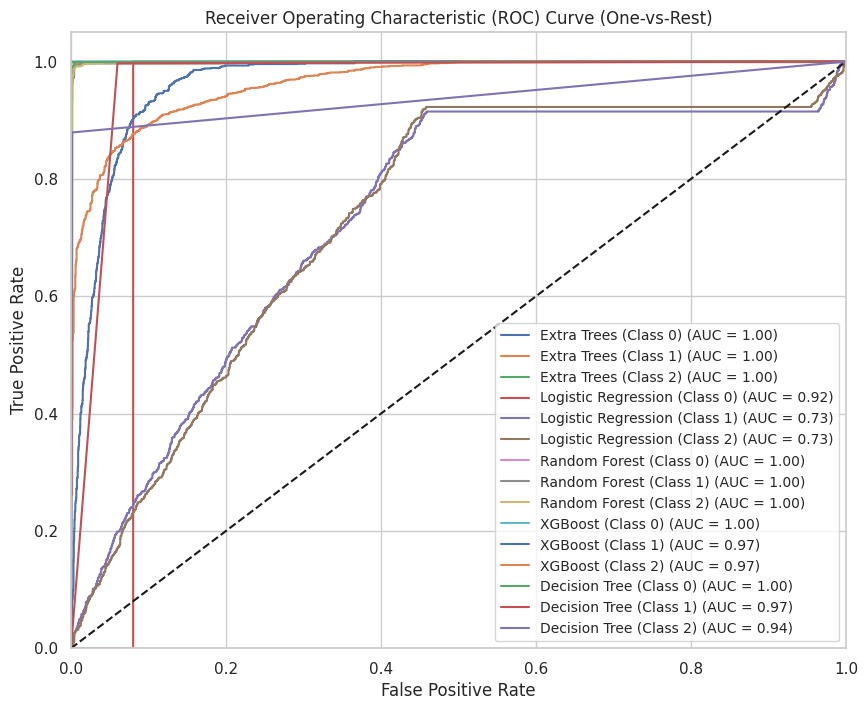

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Initialize classifiers
classifiers = {
    "Extra Trees": ExtraTreesClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Convert target variable to binary format (one-vs-rest)
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)  # Corrected variable names
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(x_test)
    else:
        y_score = clf.decision_function(x_test)
    # Compute ROC curve and ROC area for each class
    for i in range(len(np.unique(y_train))):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (Class %d) (AUC = %0.2f)' % (name, i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right", fontsize='small')

# Save the plot as an image
plt.savefig('roccurve2.jpeg', dpi=300)  # Specify the file name and DPI (dots per inch)
plt.show()
